Verificando preço de ações

In [14]:
! pip install yfinance mplcyberpunk

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import yfinance as yf

STK = input("Enter Share Name: ") # MXRF11.SA

data = yf.Ticker(STK).history(period="1d")

last_market_price = data['Close'].iloc[-1]

print("Last market price:", last_market_price)

Last market price: 9.380000114440918


Gerando gráfico

In [5]:
! pip install yfinance pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00a 0:00:01


Last market price for MXRF11.SA: 9.380000114440918
Preço salvo no arquivo 'precos.csv'.


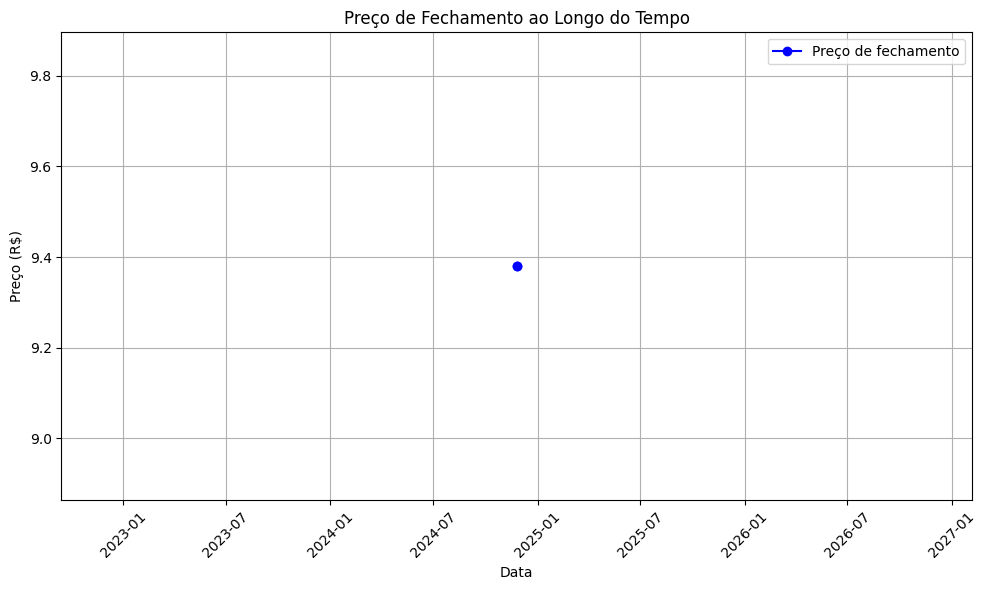

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

def salvar_preco_em_arquivo():
    STK = input("Enter Share Name: ")  # Ex: MXRF11.SA

    # Coleta os dados do preço de fechamento
    data = yf.Ticker(STK).history(period="1d")

    # Pega o preço de fechamento mais recente
    last_market_price = data['Close'].iloc[-1]
    
    print(f"Last market price for {STK}: {last_market_price}")

    # Verifica se o arquivo CSV já existe
    file_exists = os.path.isfile('precos.csv')

    # Salva o preço no arquivo CSV
    with open('precos.csv', mode='a', newline='') as file:
        # Cria um escritor CSV
        writer = pd.DataFrame({
            'Date': [data.index[-1]],  # Data mais recente
            'Price': [last_market_price]  # Preço de fechamento
        })

        # Se o arquivo não existe, escreve o cabeçalho
        if not file_exists:
            writer.to_csv(file, index=False, header=True)
        else:
            writer.to_csv(file, index=False, header=False, mode='a')

    print("Preço salvo no arquivo 'precos.csv'.")

def gerar_grafico():
    # Lê os dados do arquivo CSV
    df = pd.read_csv('precos.csv')

    # Verifica se o arquivo está vazio
    if df.empty:
        print("O arquivo CSV está vazio. Não há dados para gerar o gráfico.")
        return

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(df['Date']), df['Price'], marker='o', color='b', label='Preço de fechamento')
    plt.title('Preço de Fechamento ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Função principal
salvar_preco_em_arquivo()
gerar_grafico()


Coleta os proços de 5 em 5 minutos durante 1 hora depois gera o gráfico

Last market price for MXRF11.SA: 9.569999694824219
Preço salvo no arquivo 'precos.csv'.


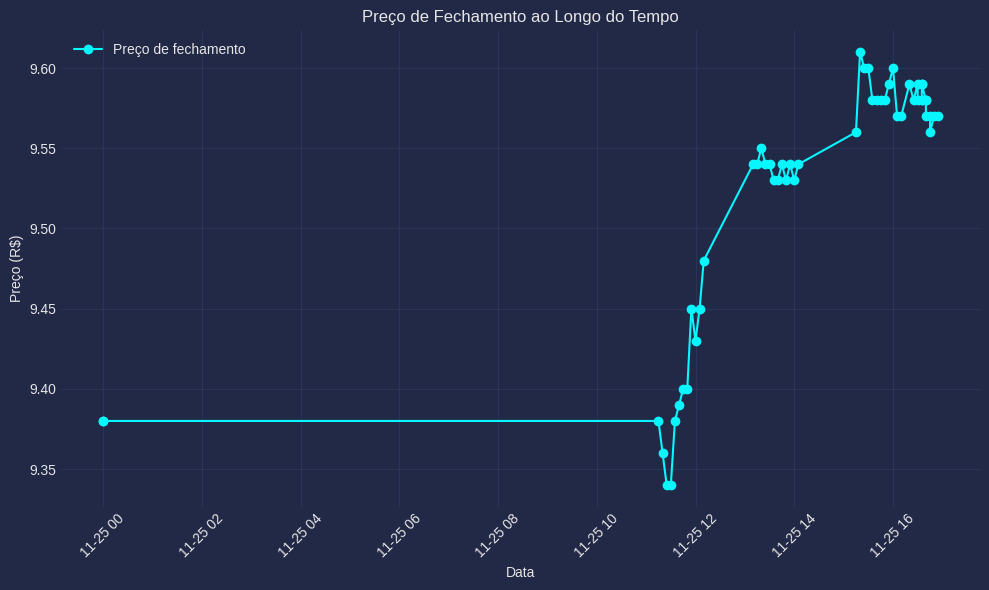

In [ ]:
import yfinance as yf
import pandas as pd
# import matplotlib.pyplot as plt
import os
import time
import mplcyberpunk

def salvar_preco_em_arquivo(STK):
    # Coleta os dados do preço de fechamento a cada 5 minutos
    data = yf.Ticker(STK).history(period="1d", interval="5m")
    
    # Pega o preço de fechamento mais recente
    last_market_price = data['Close'].iloc[-1]
    
    print(f"Last market price for {STK}: {last_market_price}")
    
    # Verifica se o arquivo CSV já existe
    file_exists = os.path.isfile('precos.csv')

    # Salva o preço no arquivo CSV
    with open('precos.csv', mode='a', newline='') as file:
        writer = pd.DataFrame({
            'Date': [data.index[-1]],  # Data mais recente
            'Price': [last_market_price]  # Preço de fechamento
        })

        # Se o arquivo não existe, escreve o cabeçalho
        if not file_exists:
            writer.to_csv(file, index=False, header=True)
        else:
            writer.to_csv(file, index=False, header=False, mode='a')

    print("Preço salvo no arquivo 'precos.csv'.")

def gerar_grafico():
    # Lê os dados do arquivo CSV
    df = pd.read_csv('precos.csv')

    # Verifica se o arquivo está vazio
    if df.empty:
        print("O arquivo CSV está vazio. Não há dados para gerar o gráfico.")
        return

    # Cria o gráfico
    plt.style.use("cyberpunk")
    # plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(df['Date']), df['Price'], marker='o', label='Preço de fechamento')
    plt.title('Preço de Fechamento ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def coletar_dados_periodicamente():
    STK = input("Enter Share Name: ")  # Ex: MXRF11.SA

    # Defina quantos minutos você quer coletar dados. Por exemplo, 60 minutos (1 hora).
    tempo_total = 60  # Quantidade total de tempo que o script vai coletar os dados (em minutos)
    
    for _ in range(tempo_total // 5):  # Coleta dados a cada 5 minutos
        salvar_preco_em_arquivo(STK)
        time.sleep(300)  # Pausa de 5 minutos (300 segundos)

    # Após o tempo de coleta, gera o gráfico
    gerar_grafico()

# Função principal
coletar_dados_periodicamente()
